In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
import pandas as pd
df = pd.read_csv('판매가격.csv')
df

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220409.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220410.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220411.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220412.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220413.0,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
341694,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220505.0,GS칼텍스,일반,0.0,1895.0,1895.0,1400.0,36.970249,127.947000
341695,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220506.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000
341696,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220507.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000
341697,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220508.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000


In [7]:
df1 = pd.read_csv('판매가격(6월).csv')
df1

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220510.0,현대오일뱅크,셀프,1987.0,1853.0,1893.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220511.0,현대오일뱅크,셀프,2017.0,1853.0,1893.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220512.0,현대오일뱅크,셀프,2017.0,1853.0,1923.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220513.0,현대오일뱅크,셀프,2017.0,1883.0,1923.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220514.0,현대오일뱅크,셀프,2047.0,1883.0,1943.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220602.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220603.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220604.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220605.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000


In [8]:
result = pd.concat([df,df1])
result

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220409.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220410.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220411.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220412.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220413.0,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220602.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220603.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220604.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220605.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000


경유 등유 가격 비교
지역별 유가 비교 (수도권과 지방의 차이)
상표별 유가 비교
셀프여부 가격 비교
https://u-n-joe.tistory.com/108

https://github.com/Team-COSADAMA/Data-Science-Intro/blob/main/week5/9-3.ipynb

국제 유가 흐름(우크라이나 전쟁)
https://earningbirds.netlify.app/visualization/covid19-visualization-with-plotly/


지역별 유가 시각화(지도,plotly 애니메이션)
https://nbviewer.org/github/kjbpoles/Python_DataAnalytics/blob/master/DataScience/source_code/04.%20Self%20Oil%20Station%20price.ipynb

https://thlee33.medium.com/plotly%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%A7%80%EB%8F%84-%EC%95%A0%EB%8B%88%EB%A9%94%EC%9D%B4%EC%85%98-5e11fe528e4d

https://thlee33.medium.com/%EC%A0%95%EB%9F%89-%EC%86%8D%EC%84%B1%EC%9D%84-%EB%B0%98%EC%98%81%ED%95%9C-hot-spot-%EB%B6%84%EC%84%9D-b3ce471d2964

https://dailyheumsi.tistory.com/category/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80%20%ED%95%A8%EA%BB%98%20%ED%83%B1%EA%B3%A0%EB%A5%BC/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94

머신러닝 유가 예측
https://velog.io/@nuguoil

In [9]:
result['기간'] = pd.to_datetime(result['기간'], format='%Y%m%d') 
result  

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-10,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-11,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-12,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-13,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-02,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-03,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-04,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-05,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000


In [10]:
result.dtypes

지역               object
상호               object
주소               object
기간       datetime64[ns]
상표               object
셀프여부             object
고급휘발유           float64
휘발유             float64
경유              float64
실내등유            float64
위도              float64
경도              float64
dtype: object

In [11]:
import pandas as pd

import numpy as np

import bar_chart_race as bcr

In [12]:
# 행은 'season', 열은 'team', 데이터는 points로 데이터 프레임 변경
df = result.pivot_table(values = '휘발유', index = '기간', columns = '지역')
# 확인
df = df.iloc[1:,:]
df = df.iloc[:-1,:]
df.head()

지역,강원 강릉시,강원 고성군,강원 동해시,강원 삼척시,강원 속초시,강원 양구군,강원 양양군,강원 영월군,강원 원주시,강원 인제군,...,충북 단양군,충북 보은군,충북 영동군,충북 옥천군,충북 음성군,충북 제천시,충북 증평군,충북 진천군,충북 청주시,충북 충주시
기간,,,,,,,,,,,,,,,,,,,,,
2022-04-10,1978.226190,1890.388889,1976.666667,1940.225806,1977.363636,1804.6,1997.000000,1829.458333,1923.480769,1999.120000,...,1960.838710,2018.413793,1949.068966,1995.878788,1982.631579,1868.901408,1991.500,1967.655172,1973.247706,1974.186047
2022-04-11,1977.750000,1889.833333,1973.151515,1939.258065,1975.545455,1804.6,1994.666667,1905.041667,1941.171429,1919.538462,...,1958.903226,2018.413793,2015.965517,1994.727273,2006.435897,1895.225352,1985.875,2000.913793,1962.281818,1949.302326
2022-04-12,1954.440476,1889.833333,1909.147059,1937.967742,1971.909091,1804.6,1993.000000,1904.208333,1936.903846,1997.192308,...,2018.967742,2018.413793,2014.275862,1992.090909,2004.679487,1919.718310,1984.625,1998.689655,1958.022727,1971.081395
2022-04-13,1952.988095,1888.722222,1909.617647,1936.677419,1969.000000,1806.6,1993.000000,1903.280000,1933.333333,1995.653846,...,2017.741935,2015.310345,2015.310345,1990.969697,2003.615385,1916.676056,1982.125,1996.862069,1955.595455,1968.000000
2022-04-14,1952.916667,1888.722222,1908.294118,1936.677419,1967.636364,1804.6,1992.166667,1901.680000,1931.076190,1995.653846,...,2017.741935,2015.137931,2015.310345,1991.151515,2000.038462,1913.211268,1981.500,1996.000000,1954.149321,1966.546512


In [13]:
from datetime import datetime
df_resample = df.resample(rule='W').mean()
df_resample

지역,강원 강릉시,강원 고성군,강원 동해시,강원 삼척시,강원 속초시,강원 양구군,강원 양양군,강원 영월군,강원 원주시,강원 인제군,...,충북 단양군,충북 보은군,충북 영동군,충북 옥천군,충북 음성군,충북 제천시,충북 증평군,충북 진천군,충북 청주시,충북 충주시
기간,,,,,,,,,,,,,,,,,,,,,
2022-04-10,1978.226190,1890.388889,1976.666667,1940.225806,1977.363636,1804.600000,1997.000000,1829.458333,1923.480769,1999.120000,...,1960.838710,2018.413793,1949.068966,1995.878788,1982.631579,1868.901408,1991.500000,1967.655172,1973.247706,1974.186047
2022-04-17,1956.010204,1889.039683,1909.193914,1936.585253,1969.331169,1891.971429,1993.357143,1902.750000,1933.069257,1983.549451,...,2007.488479,2014.817734,2013.334975,1991.528139,1996.939560,1902.873239,1981.562500,1996.625616,1958.786969,1963.388704
2022-04-24,1971.073129,1882.000000,1966.138655,1934.626728,1965.194805,2007.800000,1988.957516,1900.377143,1924.325170,1985.972527,...,2006.400922,2007.817734,2006.610837,1990.398268,1964.205955,1864.384363,1974.178571,1991.738916,1951.258808,1950.345515
2022-05-01,1969.302721,1877.894491,1965.343010,1922.909545,1961.843228,2005.100000,1986.730159,1898.441299,1924.372789,1973.170330,...,2005.435155,1986.851378,2004.886700,1991.497835,1968.056348,1848.230471,1969.571429,1992.212878,1942.995644,1956.421831
2022-05-08,1937.413265,1844.436508,1932.911765,1901.638095,1929.642857,1945.742857,1948.198413,1881.211429,1895.338776,1958.000000,...,1985.331797,1981.744898,1965.014778,1961.878788,1963.128205,1895.207243,1961.669643,1975.298030,1930.557398,1929.187192
2022-05-15,1951.850340,1905.277311,1945.591649,1903.995238,1938.785714,1965.785714,1950.174603,1890.422857,1899.818059,1971.351648,...,2000.202765,1964.077410,1986.083744,1956.939394,1973.406593,1925.177062,1964.098214,1970.832512,1943.370536,1939.779221
2022-05-22,1958.963671,1989.680672,1971.861345,1927.590476,1971.662338,1937.785714,1979.753968,1907.474286,1933.154987,1984.934066,...,2016.631336,1974.704433,1995.433498,1976.454545,1968.501832,1944.164990,1984.650210,1976.413793,1959.427660,1954.310667
2022-05-29,2001.129825,2013.941176,1991.319328,1960.542857,2003.792208,1832.200000,2019.103175,1931.668571,1964.836927,2012.851648,...,2032.668203,2004.142857,2018.399015,2008.298701,1985.679915,1985.637827,1999.095238,1993.455665,1999.260583,1985.908507
2022-06-05,2004.361446,2041.403361,2005.403361,1966.526267,2018.818182,1847.357143,2030.182540,1951.285714,1965.042831,2031.917582,...,2047.377880,2020.876847,1982.128079,2024.281385,2011.875957,1987.776660,2004.476190,2020.312808,2004.111681,2005.990369


In [14]:
# df.iloc[:] = df.iloc[:].cumsum()

In [15]:
import matplotlib as mpl

In [16]:
mpl.rcParams['font.family'] ='Malgun Gothic'

mpl.rcParams['axes.unicode_minus'] =False

In [17]:
bcr.bar_chart_race(df = df_resample, 
                   n_bars = 10,
                   figsize=(6, 4),
                   period_length = 1500,
                   steps_per_period = 50,
                   sort='desc',
                   
                   title='지역별 유가 추이')

In [18]:
result

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-10,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-11,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-12,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-13,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-02,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-03,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-04,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-05,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000


In [19]:
df_oil = result.drop(['고급휘발유','실내등유'],axis=1)
df_oil = df_oil[df_oil['기간']=='2022-04-09']
df_oil

,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,1908.0,1838.0,37.766299,128.861114
31,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2022-04-09,S-OIL,셀프,1985.0,1899.0,37.706963,128.904158
62,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,2022-04-09,SK에너지,셀프,1980.0,1890.0,37.856506,128.839462
93,강원 강릉시,(주)명진에너지 사천지점,강원 강릉시 사천면 동해대로 3576,2022-04-09,SK에너지,셀프,1990.0,1898.0,37.805104,128.861167
124,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475,2022-04-09,SK에너지,셀프,1925.0,1870.0,37.730273,128.878509
...,...,...,...,...,...,...,...,...,...,...
341544,충북 충주시,현대오일뱅크(주)직영 서충주주유소,충청북도 충주시 대소원면 첨단산업로 123,2022-04-09,현대오일뱅크,셀프,1960.0,1869.0,36.983479,127.832816
341575,충북 충주시,현대오일뱅크㈜직영 충원대로주유소,충북 충주시 충원대로 1020,2022-04-09,현대오일뱅크,일반,1974.0,1890.0,37.015896,127.919147
341606,충북 충주시,화령개발(주)공단주유소,충청북도 충주시 국원대로 370,2022-04-09,SK에너지,일반,2019.0,1959.0,37.003835,127.931282
341637,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,2022-04-09,GS칼텍스,셀프,1958.0,1898.0,37.002103,127.673716


In [20]:
df_oil['휘발유'].mean()

1966.5367180417045

In [21]:
df_oil['경유'].mean()

1897.7026291931097

In [22]:
df_oil = result[['기간','휘발유','경유']]
df_oil = df_oil.set_index('기간')
df_oil = df_oil.resample(rule='D').mean()
df_oil

,휘발유,경유
기간,,
2022-04-09,1966.536718,1897.702629
2022-04-10,1966.914151,1896.319935
2022-04-11,1966.221204,1899.182568
2022-04-12,1964.214648,1899.080674
2022-04-13,1961.863542,1897.216520
2022-04-14,1961.185185,1897.262248
2022-04-15,1957.220411,1894.044915
2022-04-16,1957.310111,1895.048107
2022-04-17,1956.698848,1894.311950


In [24]:
bcr.bar_chart_race(df = df_oil, 
                   n_bars = 2,
                   figsize=(6, 4),
                   period_length = 500,
                   steps_per_period = 50,
                   sort='desc',
                   title='국내 유가 추이')

## 상표별 가격 비교

## 수도권과 지방의 가격 차이

## 셀프여부 차이

## 기름값의 흐름으로 보는 국제 정서

In [2]:
import folium
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import warnings

from glob import glob
from selenium import webdriver
from tqdm import notebook

from matplotlib import rc
%matplotlib inline
# get_ipython().run_line_magic("matplotlib", "inline")
plt.rcParams["axes.unicode_minus"] = False
rc('font', family='Malgun Gothic')

warnings.simplefilter(action="ignore", category=FutureWarning)

In [18]:
df

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220409.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220410.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220411.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220412.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220413.0,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
341694,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220505.0,GS칼텍스,일반,0.0,1895.0,1895.0,1400.0,36.970249,127.947000
341695,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220506.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000
341696,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220507.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000
341697,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220508.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000


In [26]:
df_today = df[df['기간']==20220509.0]
df_today

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
30,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220509.0,현대오일뱅크,셀프,1987.0,1853.0,1893.0,0.0,37.766299,128.861114
61,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,20220509.0,S-OIL,셀프,0.0,1915.0,1920.0,1400.0,37.706963,128.904158
92,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,20220509.0,SK에너지,셀프,2150.0,1955.0,1965.0,0.0,37.856506,128.839462
123,강원 강릉시,(주)명진에너지 사천지점,강원 강릉시 사천면 동해대로 3576,20220509.0,SK에너지,셀프,0.0,1970.0,1980.0,0.0,37.805104,128.861167
154,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475,20220509.0,SK에너지,셀프,0.0,1915.0,1900.0,1400.0,37.730273,128.878509
...,...,...,...,...,...,...,...,...,...,...,...,...
341574,충북 충주시,현대오일뱅크(주)직영 서충주주유소,충청북도 충주시 대소원면 첨단산업로 123,20220509.0,현대오일뱅크,셀프,2038.0,1847.0,1804.0,1480.0,36.983479,127.832816
341605,충북 충주시,현대오일뱅크㈜직영 충원대로주유소,충북 충주시 충원대로 1020,20220509.0,현대오일뱅크,일반,0.0,1891.0,1811.0,1480.0,37.015896,127.919147
341636,충북 충주시,화령개발(주)공단주유소,충청북도 충주시 국원대로 370,20220509.0,SK에너지,일반,0.0,1989.0,1999.0,1350.0,37.003835,127.931282
341667,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,20220509.0,GS칼텍스,셀프,0.0,1958.0,1928.0,1400.0,37.002103,127.673716


In [27]:
df_today = df_today.drop(['고급휘발유','경유','실내등유'],axis=1)
df_today

,지역,상호,주소,기간,상표,셀프여부,휘발유,위도,경도
30,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220509.0,현대오일뱅크,셀프,1853.0,37.766299,128.861114
61,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,20220509.0,S-OIL,셀프,1915.0,37.706963,128.904158
92,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,20220509.0,SK에너지,셀프,1955.0,37.856506,128.839462
123,강원 강릉시,(주)명진에너지 사천지점,강원 강릉시 사천면 동해대로 3576,20220509.0,SK에너지,셀프,1970.0,37.805104,128.861167
154,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475,20220509.0,SK에너지,셀프,1915.0,37.730273,128.878509
...,...,...,...,...,...,...,...,...,...
341574,충북 충주시,현대오일뱅크(주)직영 서충주주유소,충청북도 충주시 대소원면 첨단산업로 123,20220509.0,현대오일뱅크,셀프,1847.0,36.983479,127.832816
341605,충북 충주시,현대오일뱅크㈜직영 충원대로주유소,충북 충주시 충원대로 1020,20220509.0,현대오일뱅크,일반,1891.0,37.015896,127.919147
341636,충북 충주시,화령개발(주)공단주유소,충청북도 충주시 국원대로 370,20220509.0,SK에너지,일반,1989.0,37.003835,127.931282
341667,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,20220509.0,GS칼텍스,셀프,1958.0,37.002103,127.673716


In [28]:
df_today = df_today.replace(0, np.NaN)
df_today

,지역,상호,주소,기간,상표,셀프여부,휘발유,위도,경도
30,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220509.0,현대오일뱅크,셀프,1853.0,37.766299,128.861114
61,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,20220509.0,S-OIL,셀프,1915.0,37.706963,128.904158
92,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,20220509.0,SK에너지,셀프,1955.0,37.856506,128.839462
123,강원 강릉시,(주)명진에너지 사천지점,강원 강릉시 사천면 동해대로 3576,20220509.0,SK에너지,셀프,1970.0,37.805104,128.861167
154,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475,20220509.0,SK에너지,셀프,1915.0,37.730273,128.878509
...,...,...,...,...,...,...,...,...,...
341574,충북 충주시,현대오일뱅크(주)직영 서충주주유소,충청북도 충주시 대소원면 첨단산업로 123,20220509.0,현대오일뱅크,셀프,1847.0,36.983479,127.832816
341605,충북 충주시,현대오일뱅크㈜직영 충원대로주유소,충북 충주시 충원대로 1020,20220509.0,현대오일뱅크,일반,1891.0,37.015896,127.919147
341636,충북 충주시,화령개발(주)공단주유소,충청북도 충주시 국원대로 370,20220509.0,SK에너지,일반,1989.0,37.003835,127.931282
341667,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,20220509.0,GS칼텍스,셀프,1958.0,37.002103,127.673716


In [29]:
df_today = df_today.dropna()
df_today

,지역,상호,주소,기간,상표,셀프여부,휘발유,위도,경도
30,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220509.0,현대오일뱅크,셀프,1853.0,37.766299,128.861114
61,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,20220509.0,S-OIL,셀프,1915.0,37.706963,128.904158
92,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,20220509.0,SK에너지,셀프,1955.0,37.856506,128.839462
123,강원 강릉시,(주)명진에너지 사천지점,강원 강릉시 사천면 동해대로 3576,20220509.0,SK에너지,셀프,1970.0,37.805104,128.861167
154,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475,20220509.0,SK에너지,셀프,1915.0,37.730273,128.878509
...,...,...,...,...,...,...,...,...,...
341574,충북 충주시,현대오일뱅크(주)직영 서충주주유소,충청북도 충주시 대소원면 첨단산업로 123,20220509.0,현대오일뱅크,셀프,1847.0,36.983479,127.832816
341605,충북 충주시,현대오일뱅크㈜직영 충원대로주유소,충북 충주시 충원대로 1020,20220509.0,현대오일뱅크,일반,1891.0,37.015896,127.919147
341636,충북 충주시,화령개발(주)공단주유소,충청북도 충주시 국원대로 370,20220509.0,SK에너지,일반,1989.0,37.003835,127.931282
341667,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,20220509.0,GS칼텍스,셀프,1958.0,37.002103,127.673716


### 셀프 주유소 여부 가격차이

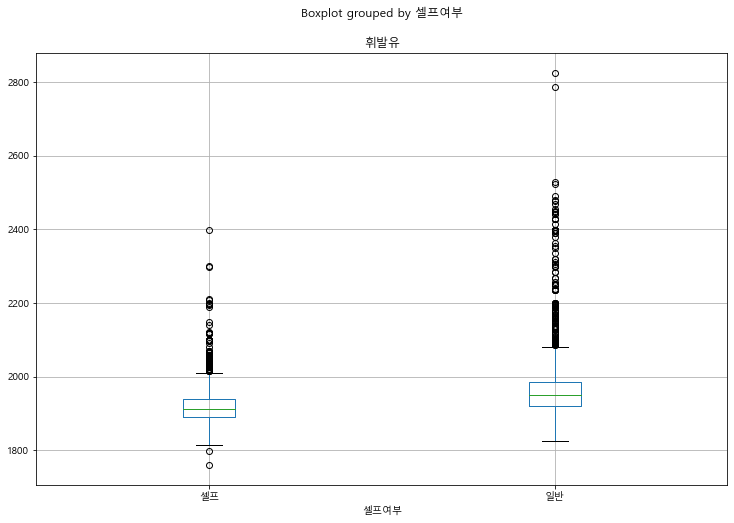

In [30]:
df_today.boxplot(column="휘발유", by = '셀프여부', figsize=(12, 8));

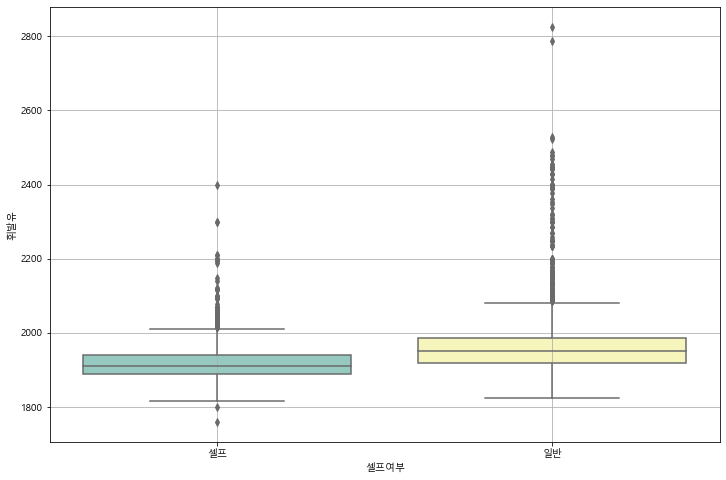

In [31]:
# Seaborn boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='셀프여부', y='휘발유', data=df_today, palette="Set3")
plt.grid()
plt.show()

### 메이커 별 가격 분포

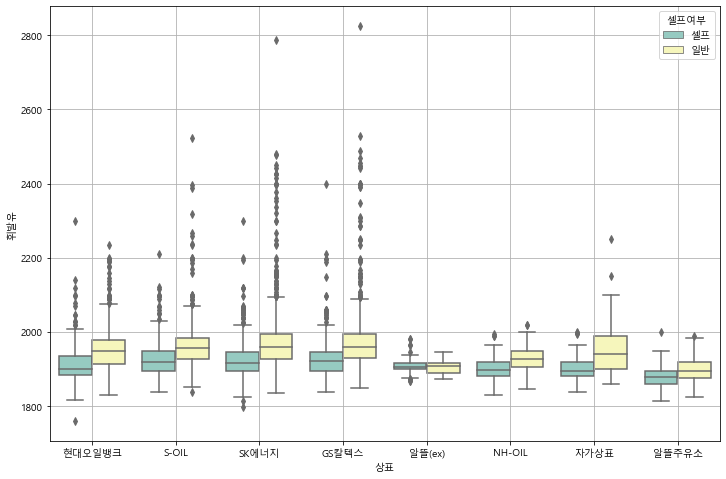

In [33]:
# Seaborn boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='휘발유', hue = '셀프여부', data=df_today, palette="Set3")
plt.grid()
plt.show()

### 휘발유 경유 비교

In [44]:
df

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220409.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220410.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220411.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220412.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220413.0,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
341694,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220505.0,GS칼텍스,일반,0.0,1895.0,1895.0,1400.0,36.970249,127.947000
341695,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220506.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000
341696,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220507.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000
341697,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220508.0,GS칼텍스,일반,0.0,1950.0,1950.0,1450.0,36.970249,127.947000


In [46]:
df_oil = df.drop(['고급휘발유','실내등유'],axis=1)
df_oil = df_oil[df_oil['기간']==20220509.0]
df_oil

,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,위도,경도
30,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220509.0,현대오일뱅크,셀프,1853.0,1893.0,37.766299,128.861114
61,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,20220509.0,S-OIL,셀프,1915.0,1920.0,37.706963,128.904158
92,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,20220509.0,SK에너지,셀프,1955.0,1965.0,37.856506,128.839462
123,강원 강릉시,(주)명진에너지 사천지점,강원 강릉시 사천면 동해대로 3576,20220509.0,SK에너지,셀프,1970.0,1980.0,37.805104,128.861167
154,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475,20220509.0,SK에너지,셀프,1915.0,1900.0,37.730273,128.878509
...,...,...,...,...,...,...,...,...,...,...
341574,충북 충주시,현대오일뱅크(주)직영 서충주주유소,충청북도 충주시 대소원면 첨단산업로 123,20220509.0,현대오일뱅크,셀프,1847.0,1804.0,36.983479,127.832816
341605,충북 충주시,현대오일뱅크㈜직영 충원대로주유소,충북 충주시 충원대로 1020,20220509.0,현대오일뱅크,일반,1891.0,1811.0,37.015896,127.919147
341636,충북 충주시,화령개발(주)공단주유소,충청북도 충주시 국원대로 370,20220509.0,SK에너지,일반,1989.0,1999.0,37.003835,127.931282
341667,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,20220509.0,GS칼텍스,셀프,1958.0,1928.0,37.002103,127.673716


In [48]:
df_oil['휘발유'].mean()

1930.4066352429297

In [49]:
df_oil['경유'].mean()

1929.3940355329948